In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal as sig

%matplotlib inline

### WGN test

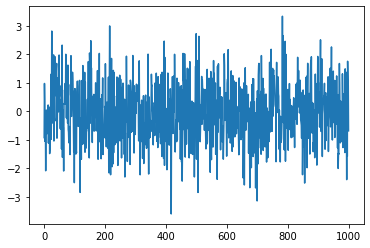

In [2]:
wgn  = np.random.randn(1000)
plt.plot(wgn)

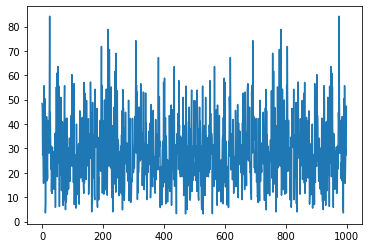

In [3]:
wgn_fft = np.fft.fft(wgn)
plt.plot(abs(wgn_fft))

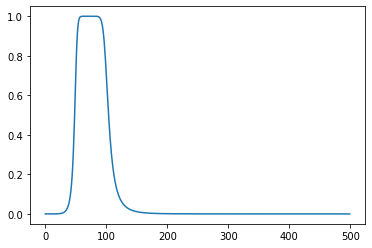

In [4]:
b,a = sig.butter(5,[50,100],btype='band', fs=1000)
w,h = sig.freqz(b,a,fs = 1000)

plt.plot(w,abs(h))
plt.show()

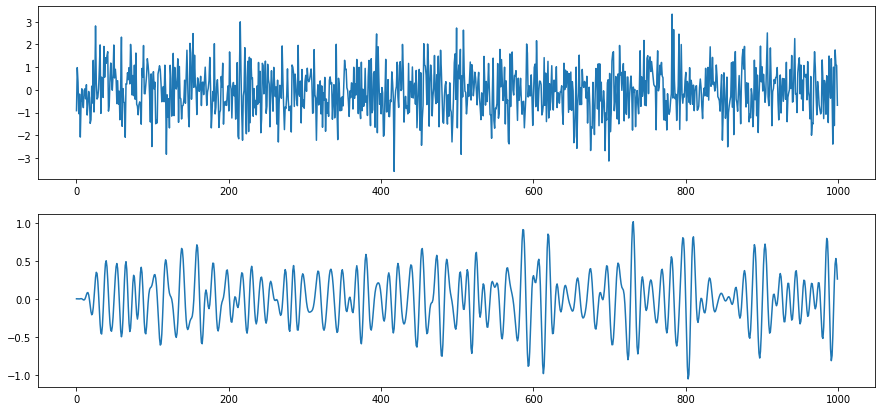

In [5]:
y = sig.lfilter(b,a,wgn)
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(wgn)

plt.subplot(212)
plt.plot(y)

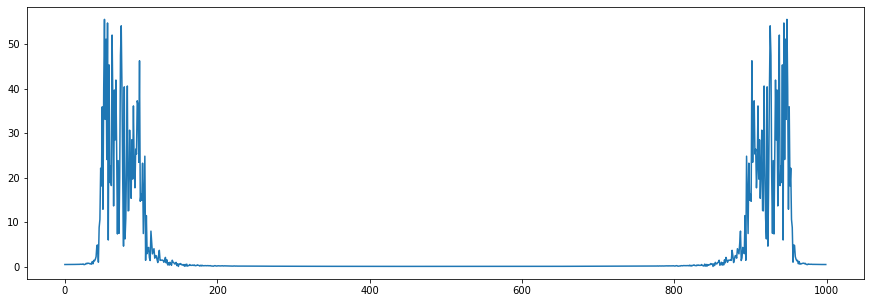

In [6]:
plt.figure(figsize=(15,5))
plt.plot(abs(np.fft.fft(y)))

## Data Production and Storage

In [7]:
import json

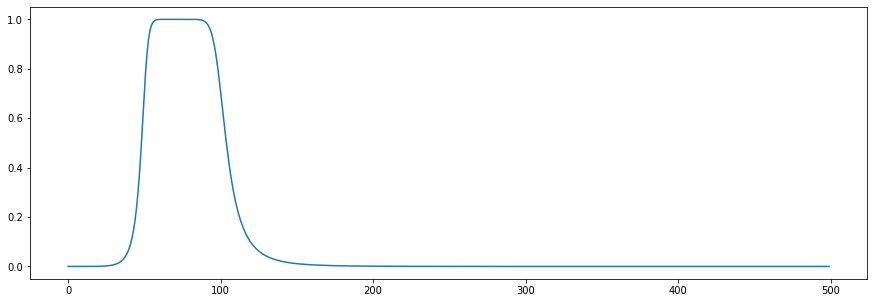

In [8]:
b,a = sig.butter(N=5,Wn=[50,100],btype='bandpass',fs=1000)
w,h = sig.freqz(b,a,fs=1000)

plt.figure(figsize=(15,5))
plt.plot(w,abs(h))
plt.show()

In [9]:
num_sigs = 300
data = []
for _ in range(num_sigs):
    x = np.random.randn(1000)
    y = sig.lfilter(b,a,x)
    data.append({'x':x.tolist() ,'y': y.tolist() })

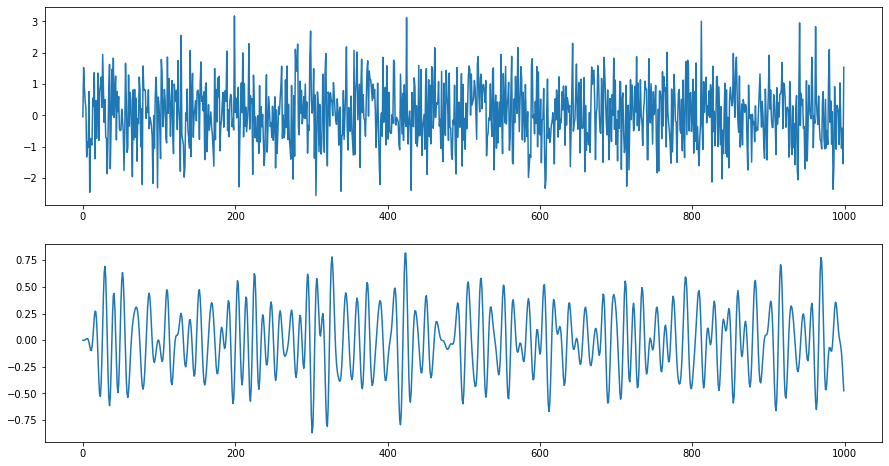

In [10]:
plt.figure(figsize=(15,8))

plt.subplot(211)
plt.plot(data[0]['x'])

plt.subplot(212)
plt.plot(data[0]['y'])

plt.show()

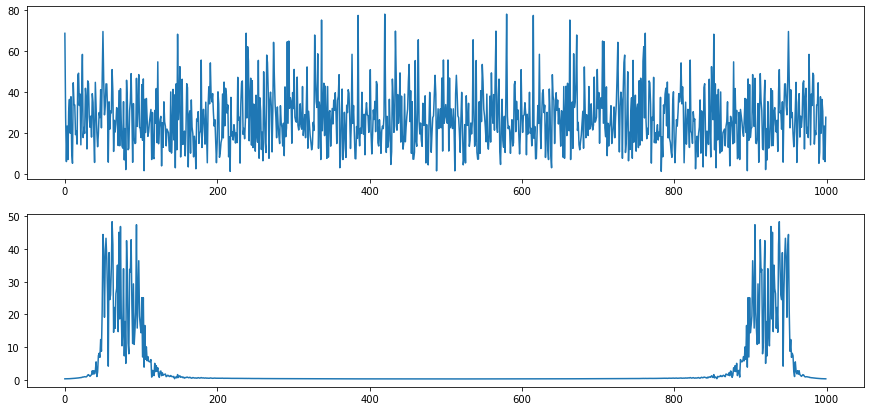

In [11]:
plt.figure(figsize=(15,7))

plt.subplot(211)
plt.plot(abs(np.fft.fft(data[0]['x'])))

plt.subplot(212)
plt.plot(abs(np.fft.fft(data[0]['y'])))

plt.show()

In [12]:
file = open('./data.json',mode='w')
json.dump(data,file,indent=4)